In [1]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [47]:
import os
import shutil
from sklearn.model_selection import train_test_split
import random
from PIL import Image
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import UpSampling2D, Conv2D  # 누락된 import 추가
from tensorflow.keras import Model  # Model 클래스 import 추가

# 원본 폴더와 대상 폴더 경로 설정
source_folder = '/content/drive/MyDrive/K-fashion/vector model/A_folder'
destination_folder = '/content/local/A_folder/'

# 원본 폴더에서 대상 폴더로 이미지 복사 (폴더가 없을 경우)
if not os.path.exists(destination_folder):
    shutil.copytree(source_folder, destination_folder)

# 대상 폴더의 이미지 리스트 생성
image_files = os.listdir(destination_folder)

# 이미지 파일을 랜덤하게 train과 test로 분할
train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)

image_size = (32, 32)

# 이미지 데이터를 불러와서 NumPy 배열로 변환
train_images = np.array([np.array(Image.open(os.path.join(destination_folder, file)).resize(image_size)) for file in train_files])
test_images = np.array([np.array(Image.open(os.path.join(destination_folder, file)).resize(image_size)) for file in test_files])

# 데이터 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

# TensorFlow 변수에 할당 (여기서는 MNIST 예제와 유사하게 변수명을 사용)
train_X, train_Y = train_images, None  # train_Y는 필요에 따라 레이블을 할당
test_X, test_Y = test_images, None  # test_Y는 필요에 따라 레이블을 할당

print(train_X.shape)
print(test_X.shape)

(1808, 32, 32, 3)
(452, 32, 32, 3)


In [ ]:
#test3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Conv2DTranspose
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split
import random
from PIL import Image
import tensorflow as tf
import numpy as np


# 원본 폴더와 대상 폴더 경로 설정
source_folder = '/content/drive/MyDrive/K-fashion/vector model/A_folder'
destination_folder = '/content/local/A_folder/'

# 원본 폴더에서 대상 폴더로 이미지 복사 (폴더가 없을 경우)
if not os.path.exists(destination_folder):
    shutil.copytree(source_folder, destination_folder)

# 대상 폴더의 이미지 리스트 생성
image_files = os.listdir(destination_folder)

# 이미지 파일을 랜덤하게 train과 test로 분할
train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)

image_size = (28, 28)

# 이미지 데이터를 불러와서 NumPy 배열로 변환
train_images = np.array([np.array(Image.open(os.path.join(destination_folder, file)).resize(image_size)) for file in train_files])
test_images = np.array([np.array(Image.open(os.path.join(destination_folder, file)).resize(image_size)) for file in test_files])

# 이미지 데이터를 float32로 형변환하고, 차원을 추가
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# TensorFlow 변수에 할당
train_X, train_Y = train_images, None  # train_Y는 필요에 따라 레이블을 할당
test_X, test_Y = test_images, None  # test_Y는 필요에 따라 레이블을 할당


# Initialize the model
autoencoder = Sequential()

# Encoder Part (Now using 3 channels for color images)
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(28,28,3), activation='elu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='elu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='elu'))

# Decoder Part
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='elu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='elu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='elu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(3, kernel_size=3, padding='same', activation='sigmoid'))

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

autoencoder.summary()


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 8)          0         
 g2D)                                                            
                                                                 
 conv2d_66 (Conv2D)          (None, 4, 4, 8)           584       
                                                                 
 conv2d_67 (Conv2D)          (None, 4, 4, 8)         

In [ ]:
## test2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape, Conv2DTranspose

# Initialize the model
autoencoder = Sequential()

# Encoder Part (Now using 3 channels for color images)
autoencoder.add(Conv2D(32, kernel_size=2, strides=(2, 2), activation='relu', input_shape=(32, 32, 3)))  # 14 x 14
autoencoder.add(Conv2D(64, kernel_size=2, strides=(2, 2), activation='relu'))  # 7 x 7
autoencoder.add(Flatten())  # Flatten the 3D output to 1D tensor
autoencoder.add(Dense(64, activation='relu'))  # Latent space

# Decoder Part
autoencoder.add(Dense(8 * 8 * 64, activation='relu'))  # 7 x 7 image with 64 filters
autoencoder.add(Reshape((8, 8, 64)))  # Reshape it to the original dimensions
autoencoder.add(Conv2DTranspose(32, kernel_size=2, strides=(2, 2), padding='same', activation='relu'))  # Up-sampling
autoencoder.add(Conv2DTranspose(3, kernel_size=2, strides=(2, 2), padding='same', activation='sigmoid'))  # Final layer to generate the output image with 3 channels

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

autoencoder.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_75 (Conv2D)          (None, 16, 16, 32)        416       
                                                                 
 conv2d_76 (Conv2D)          (None, 8, 8, 64)          8256      
                                                                 
 flatten_4 (Flatten)         (None, 4096)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                262208    
                                                                 
 dense_9 (Dense)             (None, 4096)              266240    
                                                                 
 reshape_4 (Reshape)         (None, 8, 8, 64)          0         
                                                                 
 conv2d_transpose_4 (Conv2DT  (None, 16, 16, 32)     

In [ ]:
#test1
# from tensorflow.keras import Input, Model
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape
# from tensorflow.keras.applications import VGG16

# # VGG16 전이학습으로 오토인코더, 잠재벡터 뽑기
# vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# vgg16.trainable = False  # Freeze the VGG16 layers

# # Custom encoder using VGG16
# encoder_input = Input(shape=(32, 32, 3))
# encoder_output = vgg16(encoder_input)
# encoder_output = Flatten()(encoder_output)
# encoder_output = Dense(64, activation='relu')(encoder_output)

# # 디코딩(거꾸로)
# decoder_input = Dense(16 * 16 * 128, activation='relu')(encoder_output)
# decoder_input = Reshape((16, 16, 128))(decoder_input)
# decoder_output = UpSampling2D((2, 2))(decoder_input)
# decoder_output = Conv2D(64, (3, 3), activation='relu', padding='same')(decoder_output)
# decoder_output = UpSampling2D((2, 2))(decoder_output)
# decoder_output = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoder_output)

# # Combine Encoder and Decoder into an Autoencoder model
# autoencoder = Model(inputs=encoder_input, outputs=decoder_output)

# # Compile the model
# autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

# autoencoder.summary()
#--------------------------------------------------------------------------------#

In [48]:
#test1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.applications import VGG16

# VGG16 모델
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg16.trainable = False  # Freeze the VGG16 layers

# 오토인코더 모델
autoencoder = Sequential()

# 인코더 부분 (VGG16)
autoencoder.add(vgg16)

# Flatten과 Dense
autoencoder.add(Flatten())
autoencoder.add(Dense(64, activation='relu'))

# 디코더 부분
autoencoder.add(Dense(8 * 8 * 128, activation='relu'))
autoencoder.add(Reshape((8, 8, 128)))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

# 모델 컴파일
input_img = autoencoder.input  # input_img 변수 추가
decoded = autoencoder.layers[-1].output  # decoded 변수 추가
autoencoder = Model(input_img, decoded)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])

# 모델 요약
autoencoder.summary()



Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16_input (InputLayer)    [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 64)                32832     
                                                                 
 dense_17 (Dense)            (None, 8192)              532480    
                                                                 
 reshape_8 (Reshape)         (None, 8, 8, 128)         0         
                                                                 
 up_sampling2d_14 (UpSamplin  (None, 16, 16, 128)      0  

In [49]:
# Train the model (모델학습, vgg16 기반 모델 학습하기.)
history = autoencoder.fit(
    train_X, train_X,  # 입력과 출력이 같습니다.
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_X, test_X)
)

# 학습 이력에서 손실과 MSE를 가져옵니다.
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_mse = history.history['mse']
val_mse = history.history['val_mse']

# 학습 과정을 출력
print("Train Loss: ", train_loss)
print("Validation Loss: ", val_loss)
print("Train MSE: ", train_mse)
print("Validation MSE: ", val_mse)

# 인코딩 및 디코딩까지 하는 모델. 난 안쓸거.
autoencoder.save("autoencoder_vgg16.h5")

Epoch 1/50
15/15 [==============================] - 3s 69ms/step - loss: 0.6585 - mse: 0.0551 - val_loss: 0.6448 - val_mse: 0.0464
Epoch 2/50
15/15 [==============================] - 1s 37ms/step - loss: 0.6299 - mse: 0.0420 - val_loss: 0.6260 - val_mse: 0.0380
Epoch 3/50
15/15 [==============================] - 1s 38ms/step - loss: 0.6142 - mse: 0.0350 - val_loss: 0.6163 - val_mse: 0.0337
Epoch 4/50
15/15 [==============================] - 1s 38ms/step - loss: 0.6061 - mse: 0.0314 - val_loss: 0.6110 - val_mse: 0.0312
Epoch 5/50
15/15 [==============================] - 1s 38ms/step - loss: 0.6008 - mse: 0.0290 - val_loss: 0.6072 - val_mse: 0.0296
Epoch 6/50
15/15 [==============================] - 1s 37ms/step - loss: 0.5974 - mse: 0.0275 - val_loss: 0.6051 - val_mse: 0.0287
Epoch 7/50
15/15 [==============================] - 0s 29ms/step - loss: 0.5937 - mse: 0.0259 - val_loss: 0.6017 - val_mse: 0.0271
Epoch 8/50
15/15 [==============================] - 0s 30ms/step - loss: 0.5903 - m

15/15 [==============================] - 0s 20ms/step


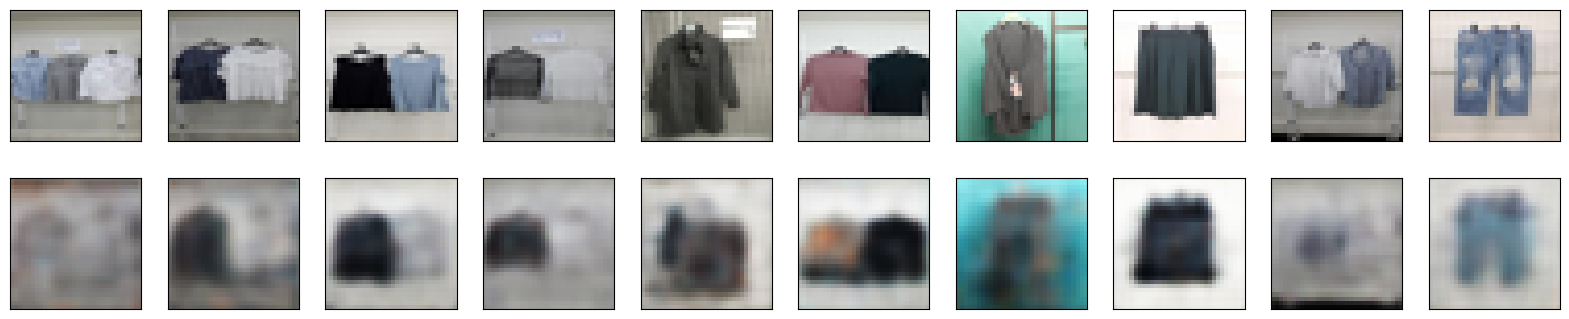

In [24]:
import matplotlib.pyplot as plt

# 테스트 이미지를 이용하여 재구성을 수행
decoded_imgs = autoencoder.predict(test_X)

# 원본 이미지와 재구성 이미지를 비교
n = 10  # 몇 개의 숫자를 나타낼 것인지
plt.figure(figsize=(20, 4))
for i in range(n):
    # 원본 이미지
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_X[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 재구성 이미지
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(32, 32, 3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
from tensorflow.keras.models import Model
import pandas as pd

# 잠재 벡터 추출 모델 저장 (인코더 부분만)
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[-6].output)
encoder_model.save("encoder_vgg16.h5")  # 인코더 모델만 저장

# 잠재 벡터 추출
latent_vectors = encoder_model.predict(train_X)

# 테이블에 저장할 데이터 준비
data = {
    'id': range(len(train_files)),
    'image_path': train_files,
    'latent_vector': list(latent_vectors),
    # 'cluster_label': ...,  # 군집화 라벨, 필요하면 추가
    # 'cluster_center_distance': ... # 군집화 중심 거리, 필요하면 추가
}

# DataFrame 생성
df = pd.DataFrame(data)
df['latent_vector'] = df['latent_vector'].apply(lambda x: ','.join(map(str, x)))

# CSV 파일로 저장
df.to_csv('latent_vectors.csv', index=False)

print("CSV 파일 만들어짐.")


In [ ]:
import csv

hash_table = {}

# CSV 파일 로딩
with open('latent_vectors.csv', mode ='r')as file:
    csvFile = csv.DictReader(file)
    for lines in csvFile:
        hash_table[lines['id']] = {
            'image_path': lines['image_path'],
            'latent_vector': lines['latent_vector'],
            # ... (다른 필드)
        }

# 이후에는 hash_table을 사용하여 빠르게 데이터에 접근 가능


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# K-means 군집화
n_clusters = 10  # 군집의 수, 이 값을 조절할 수 있습니다.
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(latent_vectors)
df['cluster_label'] = kmeans.labels_

# 군집 중심까지의 거리 계산
closest, distances = pairwise_distances_argmin_min(kmeans.cluster_centers_, latent_vectors)
df['cluster_center_distance'] = distances

# t-SNE 시각화
tsne = TSNE(n_components=2, random_state=0)
latent_tsne = tsne.fit_transform(latent_vectors)

# t-SNE 결과를 DataFrame에 추가
df['tsne-2d-one'] = latent_tsne[:, 0]
df['tsne-2d-two'] = latent_tsne[:, 1]

# t-SNE 2D 그래프
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster_label",
    palette=sns.color_palette("hsv", n_clusters),
    data=df,
    legend="full",
    alpha=0.9
)
plt.show()

# DataFrame을 CSV 파일로 저장
df.to_csv('latent_vectors_with_cluster_info.csv', index=False)


In [50]:
#위의 3개 합친거
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.manifold import TSNE
import pandas as pd
import csv


# 잠재 벡터 추출 모델 저장 (인코더 부분만)
encoder_model = Model(inputs=autoencoder.input, outputs=autoencoder.layers[-6].output)
encoder_model.save("encoder_vgg16.h5")  # 인코더 모델만 저장

# 잠재 벡터 추출
latent_vectors = encoder_model.predict(train_X)

# K-means 군집화
n_clusters = 10  # 군집의 수
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(latent_vectors)

# 각 데이터 포인트의 군집 중심까지의 거리 계산
individual_distances = np.linalg.norm(latent_vectors - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# DataFrame 생성 전에 길이 확인
assert len(train_files) == latent_vectors.shape[0] == len(kmeans.labels_) == len(individual_distances)



# t-SNE 시각화
tsne = TSNE(n_components=2, learning_rate=100, perplexity=30, random_state=0)
latent_tsne = tsne.fit_transform(latent_vectors)

# 테이블에 저장할 데이터 준비
data = {
    'id': range(len(train_files)),
    'image_path': train_files,
    'latent_vector': list(latent_vectors),
    'cluster_label': kmeans.labels_,
    'cluster_center_distance': individual_distances,  # 수정된 부분
    'tsne-2d-one': latent_tsne[:, 0],
    'tsne-2d-two': latent_tsne[:, 1]
}
print(len(train_files))  # 이미지 파일의 개수
print(latent_vectors.shape[0])  # 잠재 벡터의 개수
print(len(kmeans.labels_))  # k-means 라벨의 개수
print(len(individual_distances))  # 군집 중심까지의 거리의 개수


# DataFrame 생성
df = pd.DataFrame(data)

# 잠재 벡터를 문자열로 변환 (CSV 저장을 위해)
df['latent_vector'] = df['latent_vector'].apply(lambda x: ','.join(map(str, x)))

# DataFrame을 CSV 파일로 저장
csv_path = 'latent_vectors_with_all_info.csv'
df.to_csv(csv_path, index=False)

# 해시 테이블로 데이터 로딩
hash_table = {}
with open(csv_path, mode ='r')as file:
    csvFile = csv.DictReader(file)
    for lines in csvFile:
        hash_table[lines['id']] = {
            'image_path': lines['image_path'],
            'latent_vector': lines['latent_vector'],
            'cluster_label': lines['cluster_label'],
            'cluster_center_distance': lines['cluster_center_distance'],
            'tsne-2d-one': lines['tsne-2d-one'],
            'tsne-2d-two': lines['tsne-2d-two'],
        }


57/57 [==============================] - 1s 8ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1808
1808
1808
1808


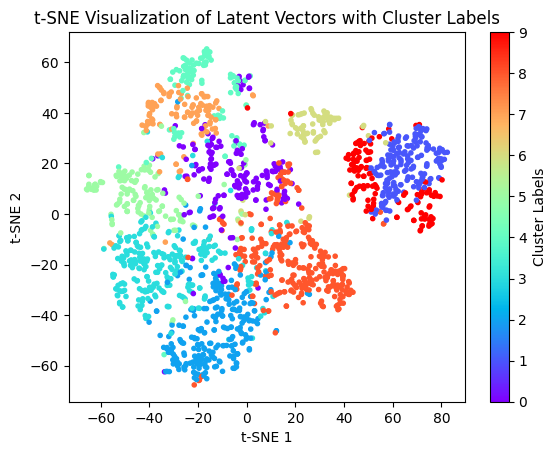

In [31]:
import matplotlib.pyplot as plt

# K-means의 라벨을 사용하여 각 군집을 다른 색으로 표시
plt.scatter(latent_tsne[:, 0], latent_tsne[:, 1], c=kmeans.labels_, cmap='rainbow', marker='.')
plt.title("t-SNE Visualization of Latent Vectors with Cluster Labels")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar().set_label('Cluster Labels')
plt.show()


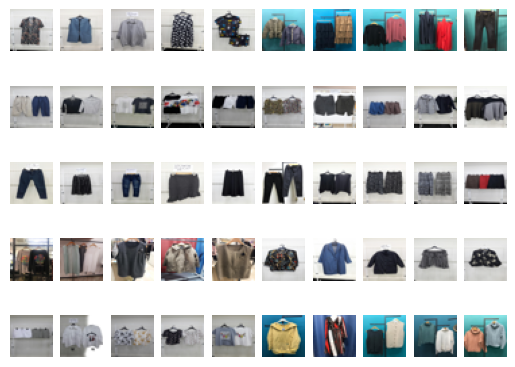

In [35]:
import matplotlib.pyplot as plt

# K-means 군집 라벨을 변수에 저장
kmeans_clusters = kmeans.labels_

# 군집별로 이미지 출력
for cluster in range(n_clusters):
    cluster_images = train_X[kmeans_clusters == cluster]
    for i in range(min(5, len(cluster_images))):  # 각 군집에서 5개 또는 그 이하의 이미지 출력
        plt.subplot(5, n_clusters, cluster * 5 + i + 1)
        plt.imshow(cluster_images[i].reshape(32, 32, 3))  # 이미지 크기가 (32, 32, 3)이라고 가정
        plt.axis('off')
plt.show()


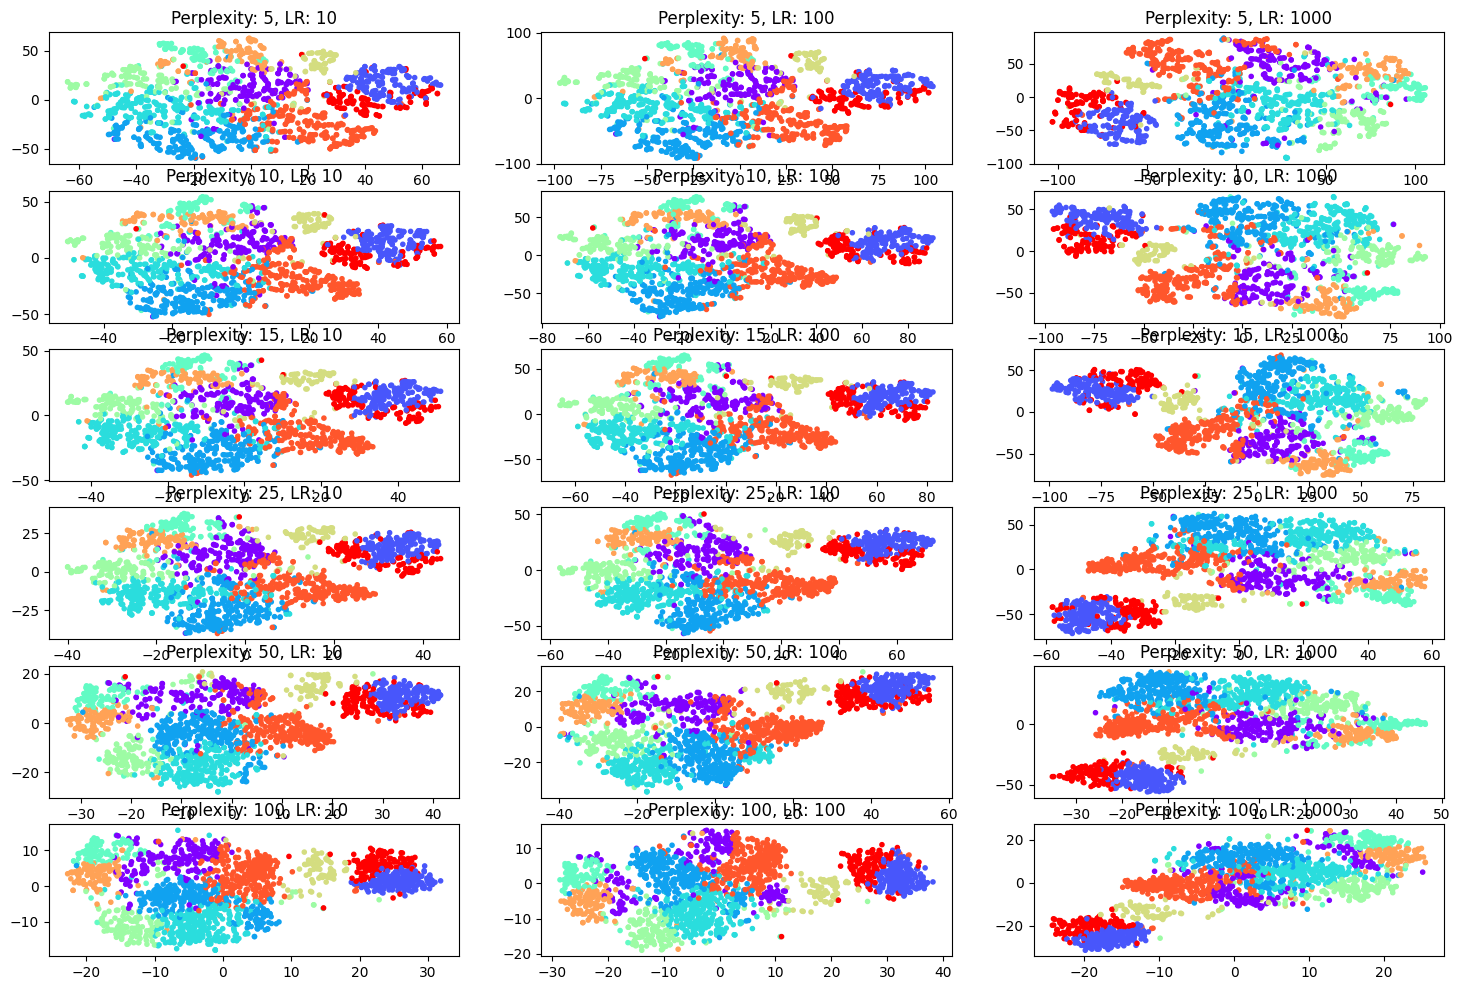

In [38]:
# 하이퍼파라미터 설정
perplexities = [5, 10, 15, 25, 50, 100]
learning_rates = [10, 100, 1000]

# 시각화 준비
plt.figure(figsize=(18, 12))

# 하이퍼파라미터 조합에 따른 t-SNE 결과 시각화
plot_idx = 1
for perp in perplexities:
    for lr in learning_rates:
        tsne = TSNE(n_components=2, learning_rate=lr, perplexity=perp, random_state=0)
        tsne_vector = tsne.fit_transform(latent_vectors)

        plt.subplot(len(perplexities), len(learning_rates), plot_idx)
        plt.scatter(tsne_vector[:, 0], tsne_vector[:, 1], marker='.', c=kmeans.labels_, cmap='rainbow')
        plt.title(f'Perplexity: {perp}, LR: {lr}')

        plot_idx += 1

plt.show()


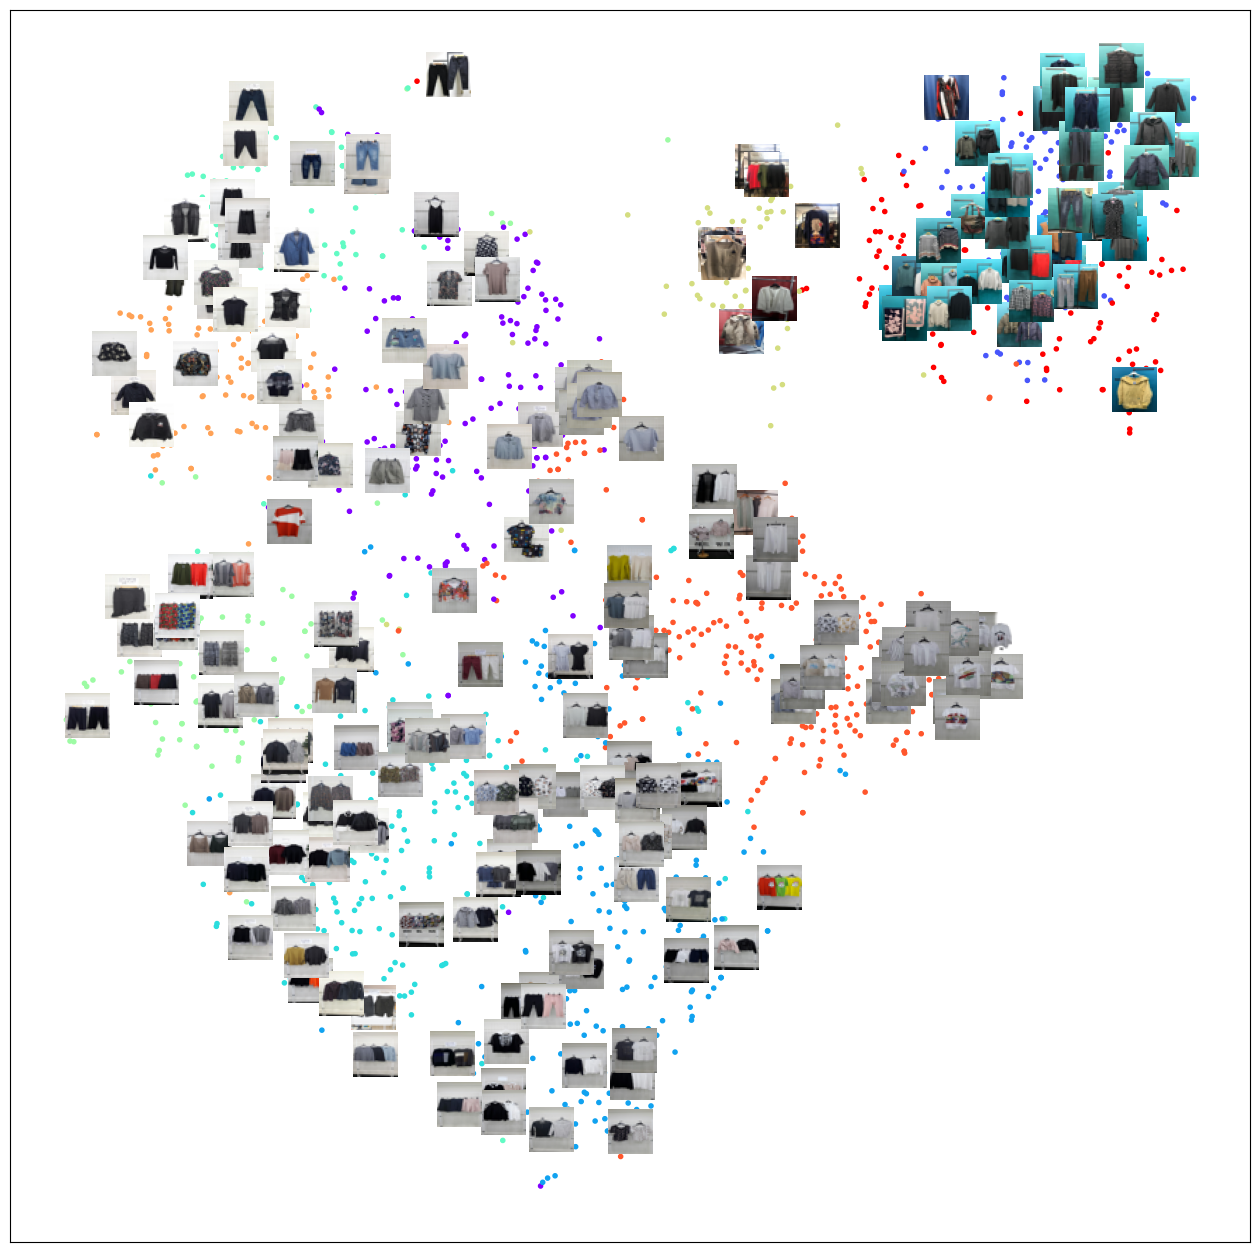

In [39]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# 설정값
n_show_images = 200  # 표시할 이미지의 수

# t-SNE 설정
tsne = TSNE(n_components=2, learning_rate=100, perplexity=30, random_state=0)
latent_tsne = tsne.fit_transform(latent_vectors)

plt.figure(figsize=(16, 16))
ax = plt.subplot(1, 1, 1)

# t-SNE 그래프 그리기
ax.scatter(latent_tsne[:, 0], latent_tsne[:, 1], marker='.', c=kmeans.labels_, cmap='rainbow')

# 이미지 표시
for i in range(n_show_images):
    imagebox = OffsetImage(train_X[i].reshape(32, 32, 3))  # 이미지 크기가 (32, 32, 3)이라고 가정
    ab = AnnotationBbox(imagebox, (latent_tsne[i, 0], latent_tsne[i, 1]), frameon=False, pad=0.0)
    ax.add_artist(ab)

# 축 없애기
ax.set_xticks([])
ax.set_yticks([])

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

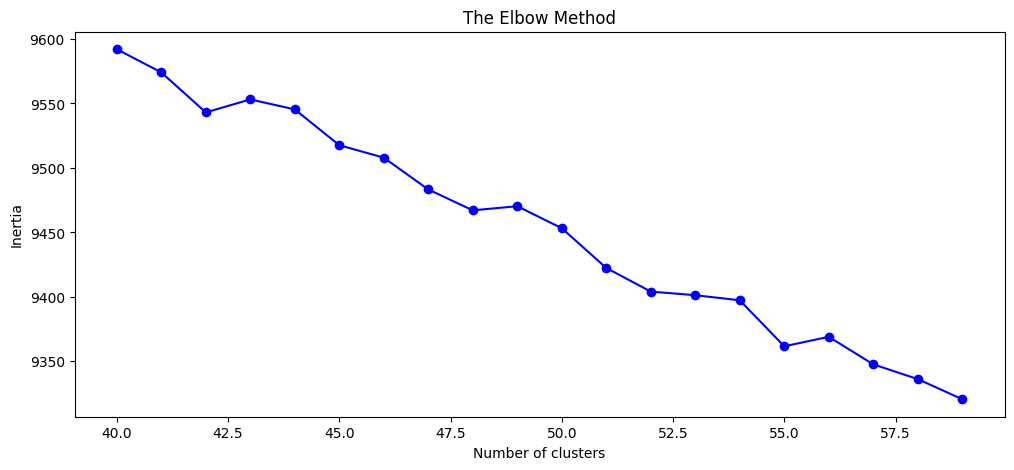

In [42]:
import numpy as np

# 임의의 latent_vectors 데이터 생성 (여기서는 실제 데이터를 사용해야 함)
latent_vectors = np.random.rand(1000, 128)

# Elbow Method를 사용하여 최적의 군집 수 찾기
inertia = []
K_range = range(40, 60)  # k의 범위는 필요에 따라 조정 가능
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(latent_vectors)
    inertia.append(kmeans.inertia_)

# Elbow 그래프 그리기
plt.figure(figsize=(12, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

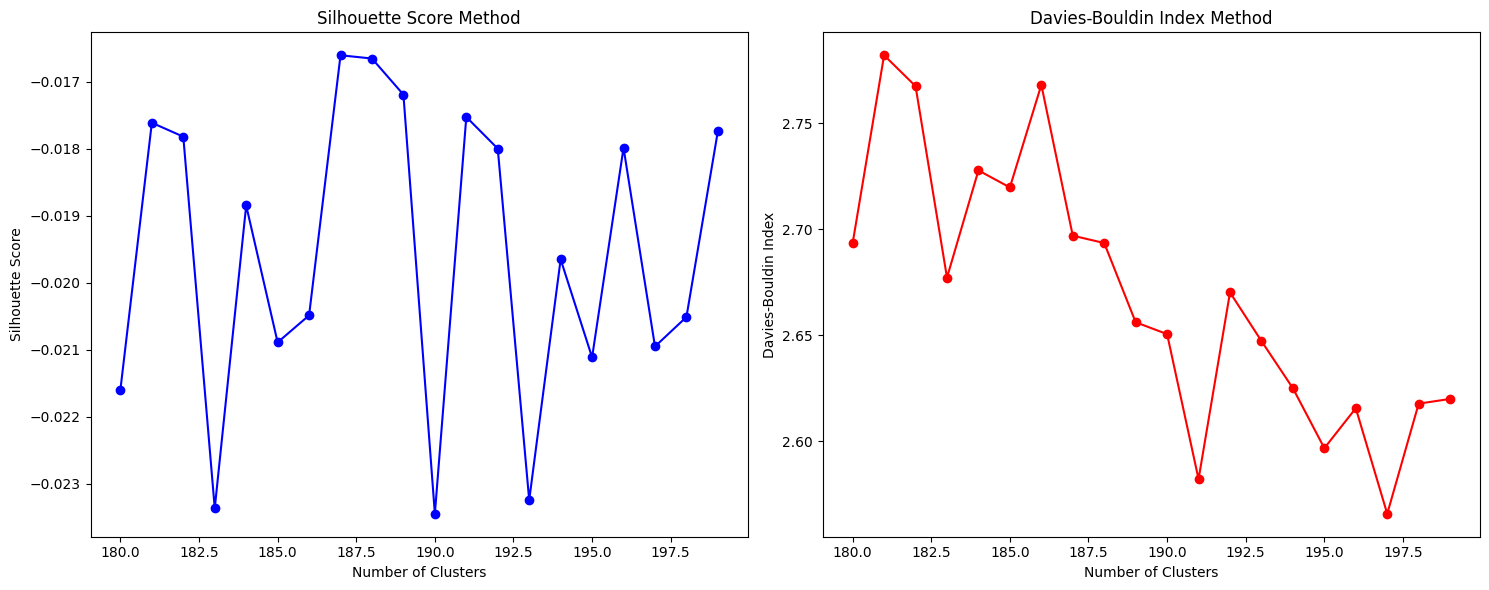

In [46]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import numpy as np

# 이미 생성된 latent_vectors를 사용하겠습니다.
# latent_vectors = encoder_model.predict(train_X)  # 이미 있으면 주석 처리

# K의 범위 설정 (예: 2부터 20까지)
K_range = range(180, 200)

# 각 지표를 저장할 빈 리스트 생성
silhouette_scores = []
davies_bouldin_scores = []

# K에 따른 모델 학습 및 지표 계산
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(latent_vectors)
    labels = kmeans.labels_

    # 실루엣 점수 계산
    silhouette_avg = silhouette_score(latent_vectors, labels)
    silhouette_scores.append(silhouette_avg)

    # Davies-Bouldin Index 계산
    db_index = davies_bouldin_score(latent_vectors, labels)
    davies_bouldin_scores.append(db_index)

# 결과 시각화
plt.figure(figsize=(15, 6))

# 실루엣 점수 그래프
plt.subplot(1, 2, 1)
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')

# Davies-Bouldin Index 그래프
plt.subplot(1, 2, 2)
plt.plot(K_range, davies_bouldin_scores, 'ro-')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index Method')

plt.tight_layout()
plt.show()


  
#아래는 서비스로직




In [52]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

def get_latent_vector(image_path = "/content/drive/MyDrive/K-fashion/vector model/B_folderAFA1CA801"):
    # 모델 불러오기
    encoder_model = load_model("encoder_vgg16.h5")

    # 이미지 불러오기 및 전처리
    image = Image.open(image_path).resize((32, 32))
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)

    # 잠재 벡터 추출
    latent_vector = encoder_model.predict(image)

    return latent_vector


In [53]:
import pandas as pd

def load_cluster_info(csv_path):
    df = pd.read_csv(csv_path)
    return df


In [54]:
from sklearn.metrics import pairwise_distances

def find_similar_cluster(latent_vector, df):
    distances = pairwise_distances(latent_vector, np.stack(df['latent_vector'].apply(lambda x: np.fromstring(x, sep=','))))
    closest_cluster_label = df.iloc[np.argmin(distances)]['cluster_label']
    return closest_cluster_label


In [58]:
def rank_within_cluster(cluster_label, df):
    same_cluster_items = df[df['cluster_label'] == cluster_label]
    ranked_items = same_cluster_items.sort_values(by='cluster_center_distance')
    return ranked_items
import json

def save_ranking_to_json(ranked_items, json_path):
    # DataFrame을 딕셔너리로 변환
    ranked_dict = ranked_items.to_dict(orient='records')

    # JSON 파일로 저장
    with open(json_path, 'w') as f:
        json.dump(ranked_dict, f)

# 예시 사용법
# 가정: 'ranked_items' 변수에는 'rank_within_cluster' 함수의 결과가 저장되어 있음
# 가정: 'json_path' 변수에는 저장할 JSON 파일의 경로가 저장되어 있음
ranked_items = rank_within_cluster(selected_cluster_label, df)
save_ranking_to_json(ranked_items, json_path='ranked_items.json')


NameError: ignored

In [63]:
from tensorflow.keras.models import load_model
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
import json

# 1. 저장된 인코더 모델 불러오기
encoder_model = load_model("encoder_vgg16.h5")

# 2. 임의의 이미지에서 잠재 벡터 추출 (임의의 이미지가 img 변수에 있다고 가정)
# 2. 이미지 경로에서 실제 이미지 로드
img_path = "/content/drive/MyDrive/K-fashion/vector model/B_folder/AFA1CA801.jpg"
img = Image.open(img_path).resize((32, 32))  # 이미지 로드 및 크기 조절
img = np.array(img)  # 이미지를 NumPy 배열로 변환
img = img / 255.0  # 정규화
img = np.expand_dims(img, axis=0)  # 배치 차원 추가

latent_vector = encoder_model.predict(img)

# 3. CSV 파일 또는 해시 테이블에서 모든 잠재 벡터와 군집 라벨 불러오기
df = pd.read_csv("latent_vectors_with_all_info.csv")

# 잠재 벡터를 리스트로 변환
df['latent_vector'] = df['latent_vector'].apply(lambda x: list(map(float, x.split(','))))

# 4. 추출된 잠재 벡터와 가장 유사한 군집 찾기
distances = pairwise_distances(latent_vector, np.stack(df['latent_vector'].to_numpy()))
closest_cluster_label = df.loc[np.argmin(distances), 'cluster_label']

# 5. 해당 군집 내에서 아이템들을 랭킹에 따라 정렬
def rank_within_cluster(cluster_label, df):
    same_cluster_items = df[df['cluster_label'] == cluster_label]
    ranked_items = same_cluster_items.sort_values(by='cluster_center_distance')
    return ranked_items

ranked_items = rank_within_cluster(closest_cluster_label, df)

# 6. 랭킹 결과를 JSON 파일로 저장
def save_ranking_to_json(ranked_items, json_path):
    ranked_image_paths = ranked_items['image_path'].tolist()
    with open(json_path, 'w') as f:
        json.dump(ranked_image_paths, f)

save_ranking_to_json(ranked_items, json_path='ranked_items.json')


1/1 [==============================] - 0s 241ms/step
